<a href="https://colab.research.google.com/github/gpreethi1910/TFODCourse/blob/main/restaurant_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


In [6]:
import os
print(os.listdir())

['.config', 'Dataset .csv', 'sample_data']


In [8]:
import pandas as pd
data=pd.read_csv('Dataset .csv')


In [9]:
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [12]:
#2 preprocess the dataset
# handle missing values by dropping rows with missing data
data=data.dropna()
# select relevant features and the target variable
features=['City', 'Locality', 'Cuisines', 'Average Cost for two',
    'Has Table booking', 'Has Online delivery', 'Price range', 'Votes']
target = 'Aggregate rating'

X =data[features]
y =data[target]

# one-hot  encode categorical variables
X = pd.get_dummies(X, columns=['City', 'Locality', 'Cuisines', 'Has Table booking', 'Has Online delivery'])

#split the data into training and testing stes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor

#Initialize the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regression - Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression - R-Squared: {r2_rf}')

Random Forest Regression - Mean Squared Error: 0.09838021856221098
Random Forest Regression - R-Squared: 0.9570398099584504


In [15]:
import pandas as pd

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                    Feature  Importance
2                                     Votes    0.946410
0                      Average Cost for two    0.007577
1                               Price range    0.002540
90                           City_New Delhi    0.002047
91                               City_Noida    0.001492
...                                     ...         ...
777      Locality_Mall of Qatar, Al Gharafa    0.000000
2585                Cuisines_Mithai, Bakery    0.000000
2586  Cuisines_Mithai, Bakery, North Indian    0.000000
766                      Locality_Madureira    0.000000
910         Locality_ParkShopping, Guar�� I    0.000000

[3178 rows x 2 columns]


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already trained the model and obtained feature importances
importances = rf_model.feature_importances_

In [17]:

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

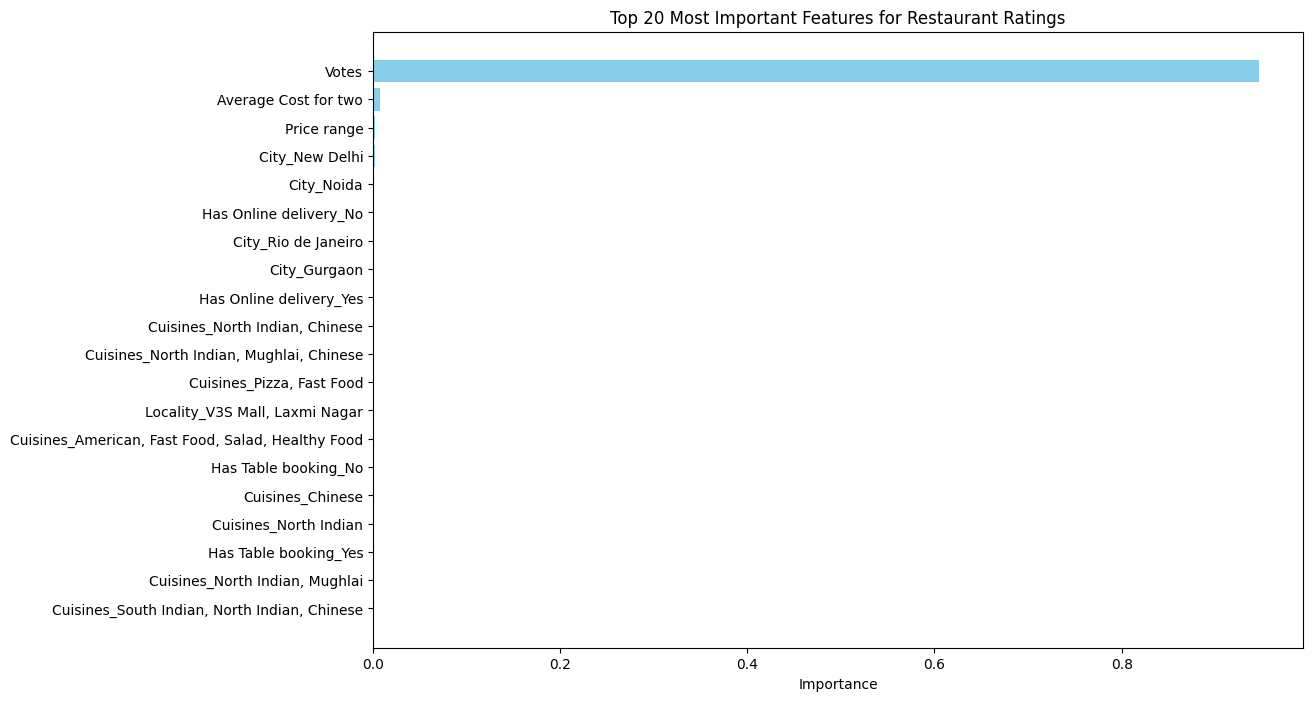

In [18]:
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Most Important Features for Restaurant Ratings')
plt.gca().invert_yaxis()
plt.show()

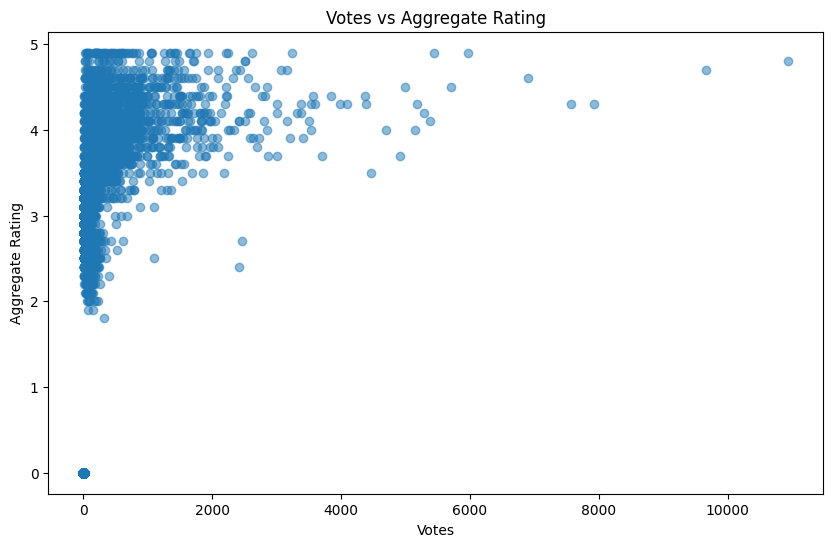

In [19]:

# Plot the relationship between Votes and Aggregate rating
plt.figure(figsize=(10, 6))
plt.scatter(data['Votes'], data['Aggregate rating'], alpha=0.5)
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.title('Votes vs Aggregate Rating')
plt.show()

In [20]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regression - Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression - R-Squared: {r2_rf}')

# Simplified Model with Fewer Features
X_simple = data[['Votes']]  # Using only 'Votes' for simplicity
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regression model
rf_model_simple = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_simple.fit(X_train, y_train)

# Make predictions
y_pred_rf_simple = rf_model_simple.predict(X_test)

# Evaluate the simplified model
mse_rf_simple = mean_squared_error(y_test, y_pred_rf_simple)
r2_rf_simple = r2_score(y_test, y_pred_rf_simple)

print(f'Simplified Random Forest Regression - Mean Squared Error: {mse_rf_simple}')
print(f'Simplified Random Forest Regression - R-Squared: {r2_rf_simple}')

# Comparing Model Performance
print(f'Original Model - Mean Squared Error: {mse_rf}')
print(f'Original Model - R-Squared: {r2_rf}')
print(f'Simplified Model - Mean Squared Error: {mse_rf_simple}')
print(f'Simplified Model - R-Squared: {r2_rf_simple}')

Random Forest Regression - Mean Squared Error: 0.09838021856221098
Random Forest Regression - R-Squared: 0.9570398099584504
Simplified Random Forest Regression - Mean Squared Error: 0.14882586605364845
Simplified Random Forest Regression - R-Squared: 0.9350114526862944
Original Model - Mean Squared Error: 0.09838021856221098
Original Model - R-Squared: 0.9570398099584504
Simplified Model - Mean Squared Error: 0.14882586605364845
Simplified Model - R-Squared: 0.9350114526862944
